In [1]:
#installing packages 

import numpy as np
import pandas as pd
from pandas_datareader import data as web
import pandas_datareader
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set the dates for the analysis

start = datetime.datetime(2018, 1, 2)
end = datetime.datetime(2019, 4, 1)

In [3]:
start = datetime.datetime(2018, 1, 2)
end = datetime.datetime(2019, 4, 1)

tickers = ['F','FCAU', 'TM',]
stocks = pd.DataFrame()
for x in tickers:
    stocks[x] = web.DataReader(x, 'yahoo', start, end)['Close']

In [4]:
#returns 

stocks_return = np.log(stocks/stocks.shift(1))
stocks_return.tail()

,F,FCAU,TM
Date,,,
2019-03-27,-0.016111,0.018031,-0.006096
2019-03-28,0.017252,-0.020730,-0.016327
2019-03-29,0.001140,0.003373,-0.008857
2019-04-01,0.022523,0.025924,0.015637
2019-04-02,0.003335,0.011742,0.006403


In [5]:
# Creating the portfolio weights (4 weights)

portfolio_weights = np.array([0.33, 0.33, 0.34])

In [6]:
# returns with weights 

weighted_returns_portfolio = stocks_return.mul(portfolio_weights, axis = 1)

weighted_returns_portfolio.tail().dropna()

,F,FCAU,TM
Date,,,
2019-03-27,-0.005317,0.005950,-0.002072
2019-03-28,0.005693,-0.006841,-0.005551
2019-03-29,0.000376,0.001113,-0.003012
2019-04-01,0.007433,0.008555,0.005317
2019-04-02,0.001101,0.003875,0.002177


In [7]:
stocks_return['Portfolio'] = weighted_returns_portfolio.sum(axis=1).dropna()
stocks_return.tail()

,F,FCAU,TM,Portfolio
Date,,,,
2019-03-27,-0.016111,0.018031,-0.006096,-0.001439
2019-03-28,0.017252,-0.020730,-0.016327,-0.006699
2019-03-29,0.001140,0.003373,-0.008857,-0.001522
2019-04-01,0.022523,0.025924,0.015637,0.021304
2019-04-02,0.003335,0.011742,0.006403,0.007152


In [8]:
start = datetime.datetime(2018, 1, 2)
end = datetime.datetime(2019, 4, 1)

stocks_return['Benchmark'] = web.DataReader('SPY','yahoo',start,end)['Close']

stocks_return['Benchmark'] = stocks_return['Benchmark'].pct_change(1).dropna()

stocks_return.dropna().tail()

,F,FCAU,TM,Portfolio,Benchmark
Date,,,,,
2019-03-27,-0.016111,0.018031,-0.006096,-0.001439,-0.005229
2019-03-28,0.017252,-0.020730,-0.016327,-0.006699,0.003790
2019-03-29,0.001140,0.003373,-0.008857,-0.001522,0.006306
2019-04-01,0.022523,0.025924,0.015637,0.021304,0.011859
2019-04-02,0.003335,0.011742,0.006403,0.007152,0.000490


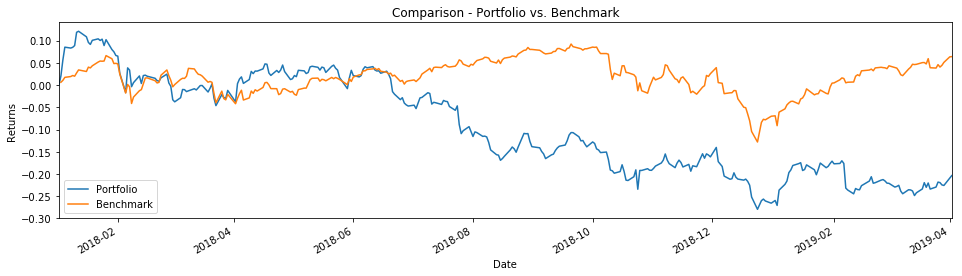

In [22]:
CumulativeReturns = ((1+stocks_return[['Portfolio','Benchmark']]).cumprod()-1)
CumulativeReturns.plot(figsize=(16,4))
_ = plt.ylabel('Returns')

_ = plt.title('Comparison - Portfolio vs. Benchmark')

_ = plt.xlabel('Date')

plt.show()

In [9]:
covariance = stocks_return.cov() * 252
covariance

,F,FCAU,TM,Portfolio,Benchmark
F,0.081996,0.056534,0.024013,0.053879,0.023830
FCAU,0.056534,0.167189,0.036997,0.086408,0.035823
TM,0.024013,0.036997,0.035576,0.032229,0.019736
Portfolio,0.053879,0.086408,0.032229,0.057070,0.026396
Benchmark,0.023830,0.035823,0.019736,0.026396,0.027260


In [16]:
covariance_market = covariance.iloc[3,4]
covariance_market 

0.026395748767295644

In [17]:
market_variance = stocks_return['Benchmark'].var() * 252
market_variance

0.0272603495656794

In [18]:
portfolio_beta = covariance_market / market_variance
portfolio_beta


0.96828357625053052

In [19]:
stocks_return['RF Rate'] = 0.0103
stocks_return.tail()

,F,FCAU,TM,Portfolio,Benchmark,RF Rate
Date,,,,,,
2019-03-27,-0.016111,0.018031,-0.006096,-0.001439,-0.005229,0.0103
2019-03-28,0.017252,-0.020730,-0.016327,-0.006699,0.003790,0.0103
2019-03-29,0.001140,0.003373,-0.008857,-0.001522,0.006306,0.0103
2019-04-01,0.022523,0.025924,0.015637,0.021304,0.011859,0.0103
2019-04-02,0.003335,0.011742,0.006403,0.007152,0.000490,0.0103


In [21]:
traynor_ratio = ((stocks_return['Portfolio'].mean() - stocks_return['RF Rate'].mean()))/portfolio_beta
traynor_ratio

-0.011269427871314531